##### To run code, ctrl + enter (Cmd + enter on Mac)
[Jupyter on VSCode](https://www.alphr.com/vs-code-open-jupyter-notebook/)

## Python and Data Science
### Part 1: Using Jupyter Notebooks

In [160]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [161]:
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [162]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


### Attributes and Labels

In machine learning:

1. Attributes (Features): Characteristics or properties of data used as input for algorithms. Also known as variables or features. Represented by a feature vector for each data point.

2. Labels (Target Variable): Values we want the model to predict or learn. The dataset is labeled in supervised learning, where each data point has an associated label serving as ground truth.

The goal is to use attributes to learn patterns and relationships that enable the model to predict labels for new, unseen data.

In [163]:
predict = "G3"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [164]:
# Split into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

### Linear Regression
 Using a set of data points, the LR algorithm attempts to find a 'line of best fit' through the data.
 The 'line of best fit' is a corrrelation between the data points.
 LR is best used in a situation when there is a strong correlation of data to begin with.
 
 <table>
    <tr>
        <td>
            <img src="LR-data1.png" width="50%" />
        </td>
        <td>
            <img src="LR-data2.png" width="50%" />
        </td>
    </tr>
    <tr>
        <td>
            <p style="text-align:center">Strongly Correlated</p>
        </td>
        <td>
            <p style="text-align:center">Poorly Correlated</p>
        </td>
    </tr>
 </table>
 
 <b>Linear Equation: y = mx + b, where m is the gradient of the line.
 For any given x and a known gradient, y can be predicted.</b>

In [165]:
# Read the pickle file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [166]:
# How to use the model

# the mx + b 
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.15569956  0.9749113  -0.18874405 -0.27668281  0.04511024]
Intercept: 
 -1.533069049941023


The model is a 5D line with 5 'm' values and 1 intercept. The larger coefficient values carry more weight on the model. So in this case, the grade 'G2' has the most impact on the prediction.

In [167]:
# Using the test data set, make predictions for the G3 grade
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

11.935737628033333 [12 12  1  0  2] 11
2.714363362209464 [7 4 1 2 0] 0
9.4202927901871 [ 9 10  2  0  4] 10
13.033303987041588 [14 13  2  0  2] 13
10.681861798964695 [12 11  2  0  0] 12
7.4679365937285045 [8 9 1 3 0] 10
15.67907334697702 [14 16  3  0  0] 16
8.601081049889839 [10  9  2  0  4] 11
11.746993575883058 [12 12  2  0  2] 11
15.729189784222513 [17 15  1  0  4] 16
16.30187157479205 [18 16  3  0  0] 16
15.294525695451139 [16 15  2  0  2] 15
11.935737628033333 [12 12  1  0  2] 14
10.444076979093365 [10 11  4  0 10] 11
12.870377006796687 [14 12  2  0 20] 13
11.894390040021234 [13 12  3  0  6] 12
9.575992347140856 [10 10  2  0  4] 11
16.36796056518508 [16 16  1  0  0] 15
8.601081049889839 [10  9  2  0  4] 9
4.44180127186795 [ 6  5  1  1 14] 5
11.337070889492617 [10 12  3  0  4] 12
18.407393726247836 [19 18  3  0  0] 19
7.576053315393331 [7 9 4 0 0] 0
7.1271022561054735 [ 9  7  2  0 18] 6
16.334916069988562 [17 16  2  0  0] 17
5.727036013502043 [7 7 2 1 0] 0
7.495211598066003 [8 8 2 0

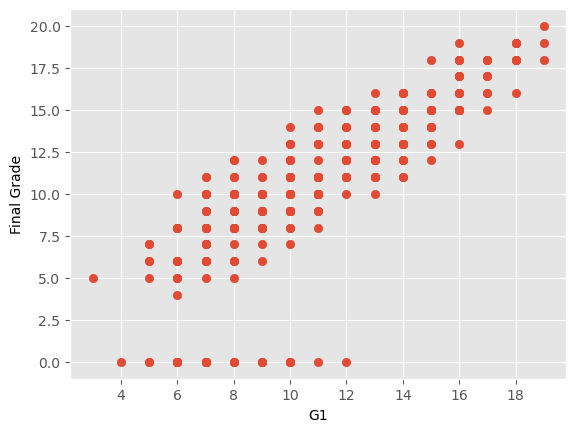

In [168]:
# Define a graph of type scatter
style.use("ggplot")

p = "G1"
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()